In [57]:
#imports to work with...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [49]:
#load train from csv
path_to_download_log = '../Kinetics/Download/attempt_14/download_log.csv'
data_csv = pd.read_csv(path_to_download_log)



In [50]:
#dict of classes and behaviors
data_dict = {
    'food': [
        'eating burger', 'eating cake', 'eating carrots', 'eating chips', 'eating doughnuts',
        'eating hotdog', 'eating ice cream', 'eating spaghetti', 'eating watermelon',
        'sucking lolly', 'tasting beer', 'tasting food', 'tasting wine', 'sipping cup'
    ],
    'phone': [
        'texting', 'talking on cell phone', 'looking at phone'
    ],
    'smoking': [
        'smoking', 'smoking hookah', 'smoking pipe'
    ],
    'fatigue': [
        'sleeping', 'yawning', 'headbanging', 'headbutting', 'shaking head'
    ],
    'selfcare': [
        'scrubbing face', 'putting in contact lenses', 'putting on eyeliner', 'putting on foundation',
        'putting on lipstick', 'putting on mascara', 'brushing hair', 'brushing teeth', 'braiding hair',
        'combing hair', 'dyeing eyebrows', 'dyeing hair'
    ]
}

In [51]:
def get_means(data_csv,csv_path=None):
    data_behavior = {}
    data_classes = {}
    mean_behavior = {}
    tmp_mean_classes = {}

    data = data_csv

    if csv_path != None:
        csv_file = pd.read_csv(csv_path)
        ids_to_retain = []
        for index, row in csv_file.iterrows():
            tmp_id = 'id_' + str(row['youtube_id']) + '_' + '{:06d}'.format(row['time_start']) + '_' + '{:06d}'.format(row['time_end'])
            ids_to_retain.append(tmp_id)
        
        data = data[data['Filename'].isin(ids_to_retain)]

    #save classes
    for class_name, subcategories in data_dict.items():
        data_classes[class_name] = []
        tmp_mean_classes[class_name] = []
        for subcategory in subcategories:
            matching_rows = data[data['Sub-behavior'] == subcategory]
            
            data_behavior[subcategory] = matching_rows
            data_classes[class_name].append(matching_rows)

            mean_length = matching_rows['Seconds'].mean()
            mean_behavior[subcategory] = mean_length
            tmp_mean_classes[class_name].append(mean_length)

    #print the means
    
    mean_classes = {}
    for class_name, subcategories in tmp_mean_classes.items():
        mean_classes[class_name] = np.mean(tmp_mean_classes[class_name])
    
    return mean_behavior, mean_classes

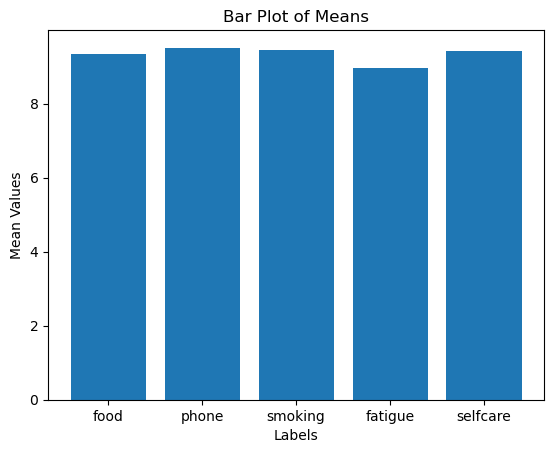

In [52]:
mean_behavior, mean_classes = get_means(data_csv)
#make a bar plot with data from mean_classes
labels = list(mean_classes.keys())
means = list(mean_classes.values())

# Create a bar plot
plt.bar(labels, means)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Mean Values')
plt.title('Bar Plot of Means')

# Show the plot
plt.show()


['eating burger', 'eating cake', 'eating carrots', 'eating chips', 'eating doughnuts', 'eating hotdog', 'eating ice cream', 'eating spaghetti', 'eating watermelon', 'sucking lolly', 'tasting beer', 'tasting food', 'tasting wine', 'sipping cup']


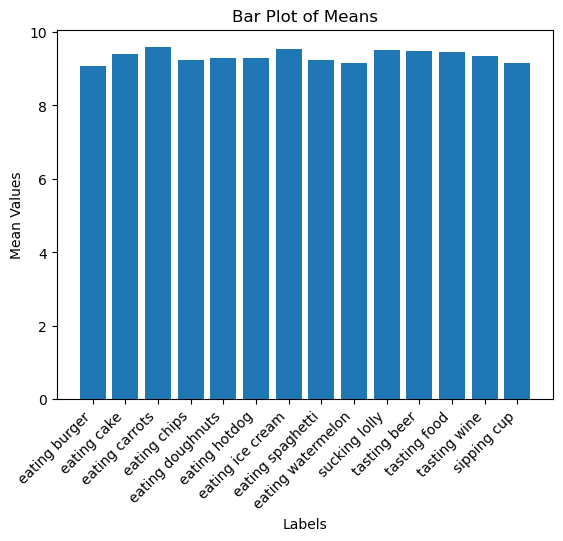

['texting', 'talking on cell phone', 'looking at phone']


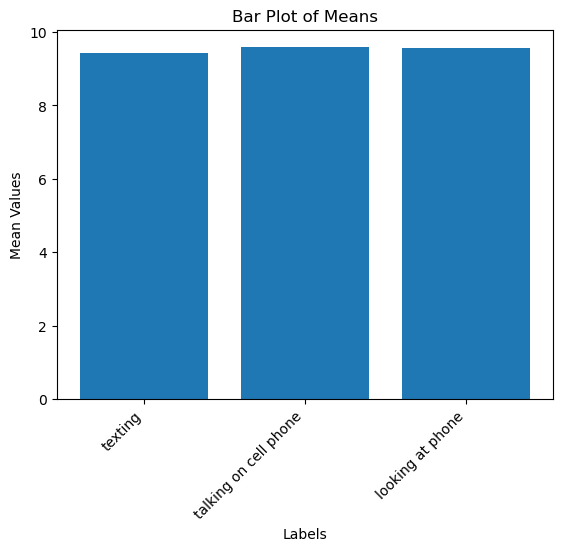

['smoking', 'smoking hookah', 'smoking pipe']


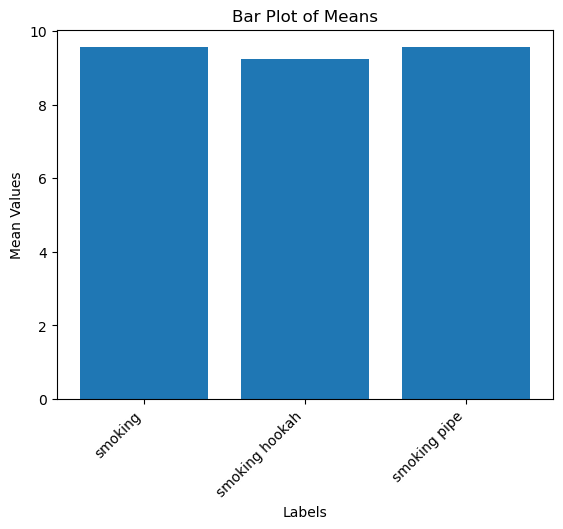

['sleeping', 'yawning', 'headbanging', 'headbutting', 'shaking head']


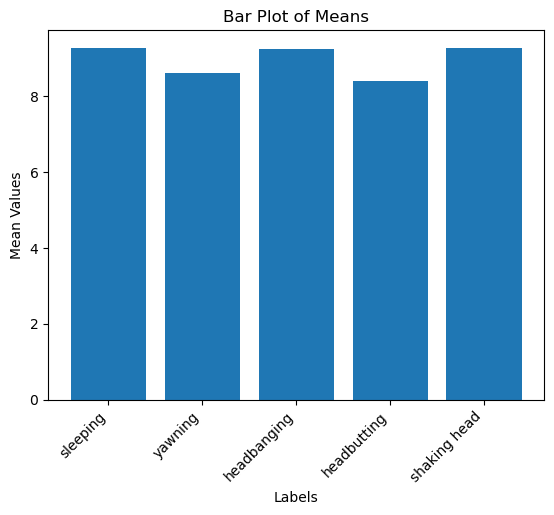

['scrubbing face', 'putting in contact lenses', 'putting on eyeliner', 'putting on foundation', 'putting on lipstick', 'putting on mascara', 'brushing hair', 'brushing teeth', 'braiding hair', 'combing hair', 'dyeing eyebrows', 'dyeing hair']


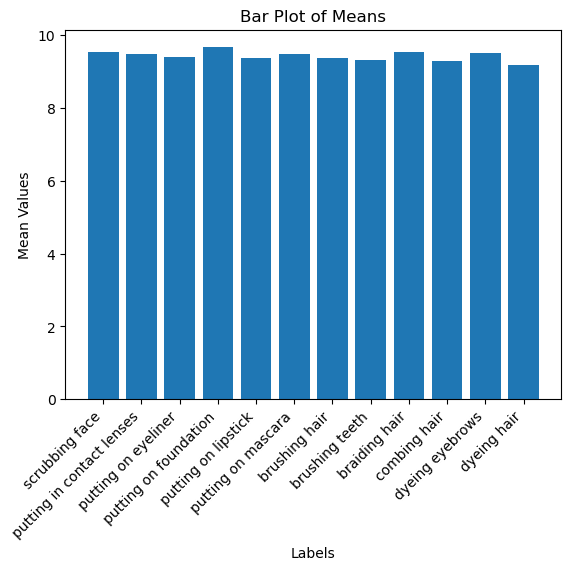

In [53]:
#make a bar plot with data from mean_behavior
labels = list(mean_behavior.keys())
means = list(mean_behavior.values())

for class_name, subcategories in data_dict.items():
    labels = list(data_dict[class_name])
    print(subcategories)
    means = [ mean_behavior[subcategory] for subcategory in subcategories]

    # Create a bar plot
    plt.bar(labels, means)

    # Add labels and title
    plt.xlabel('Labels')
    plt.ylabel('Mean Values')
    plt.title('Bar Plot of Means')
    plt.xticks(rotation=45, ha='right')


    # Show the plot
    plt.show()


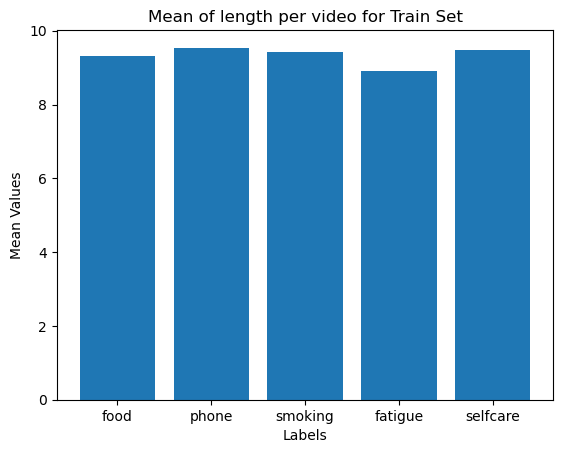

['eating burger', 'eating cake', 'eating carrots', 'eating chips', 'eating doughnuts', 'eating hotdog', 'eating ice cream', 'eating spaghetti', 'eating watermelon', 'sucking lolly', 'tasting beer', 'tasting food', 'tasting wine', 'sipping cup']


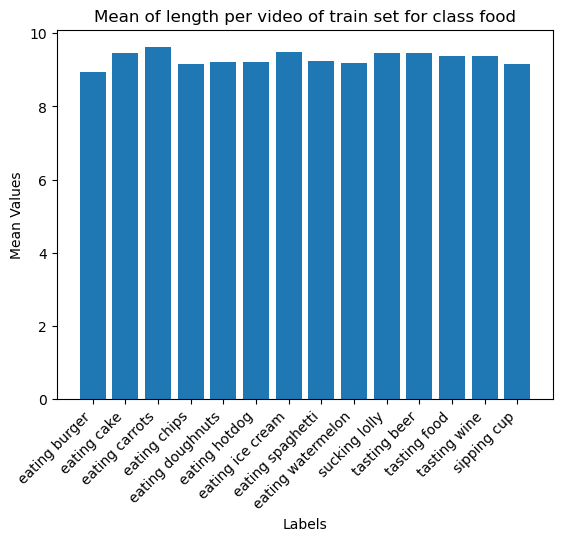

['texting', 'talking on cell phone', 'looking at phone']


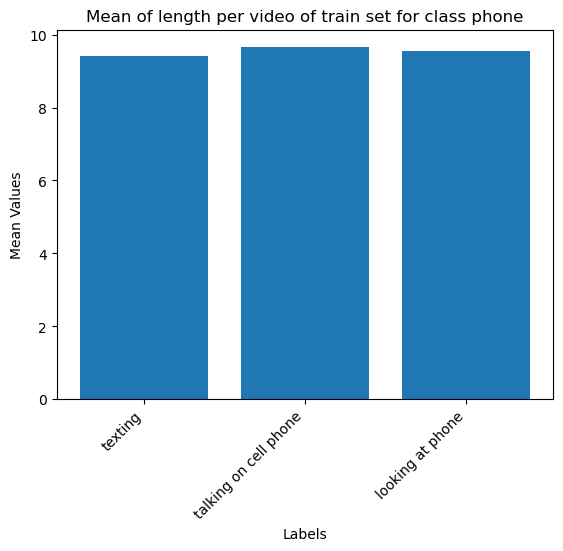

['smoking', 'smoking hookah', 'smoking pipe']


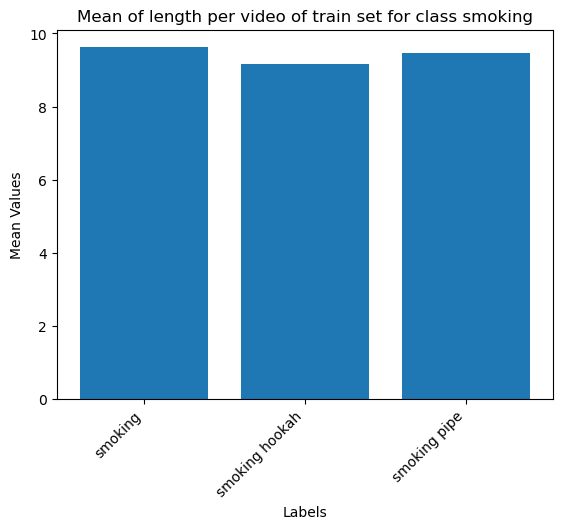

['sleeping', 'yawning', 'headbanging', 'headbutting', 'shaking head']


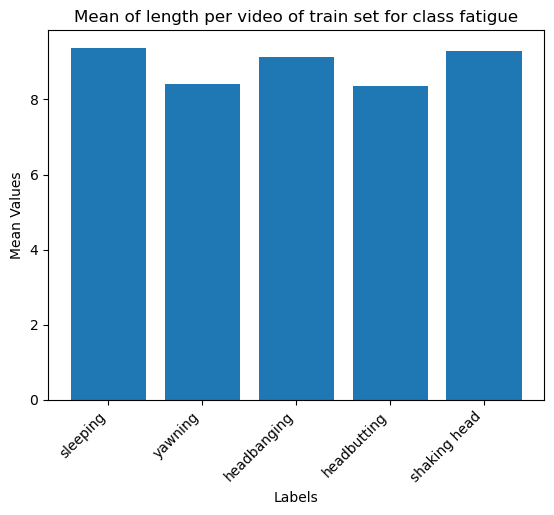

['scrubbing face', 'putting in contact lenses', 'putting on eyeliner', 'putting on foundation', 'putting on lipstick', 'putting on mascara', 'brushing hair', 'brushing teeth', 'braiding hair', 'combing hair', 'dyeing eyebrows', 'dyeing hair']


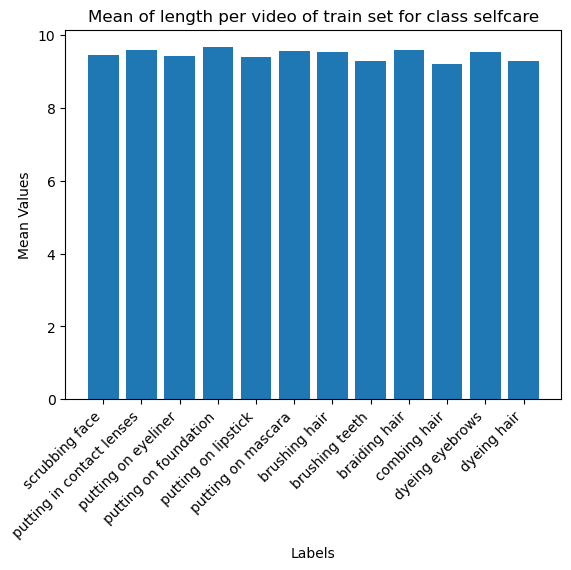

<Figure size 640x480 with 0 Axes>

In [58]:
#now only train
train_csv = '../Kinetics/Info/train.csv'

mean_behavior, mean_classes = get_means(data_csv,train_csv)
#make a bar plot with data from mean_classes
labels = list(mean_classes.keys())
means = list(mean_classes.values())

# Create a bar plot
plt.bar(labels, means)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Mean Values')
plt.title('Mean of length per video for Train Set')

# Show the plot
plt.show()

output_path = '../statistics_to_save/'
save_name = os.path.join(output_path,'train_classes.png')
plt.savefig(save_name)

#make a bar plot with data from mean_behavior
labels = list(mean_behavior.keys())
means = list(mean_behavior.values())

for class_name, subcategories in data_dict.items():
    labels = list(data_dict[class_name])
    print(subcategories)
    means = [ mean_behavior[subcategory] for subcategory in subcategories]

    # Create a bar plot
    plt.bar(labels, means)

    # Add labels and title
    plt.xlabel('Labels')
    plt.ylabel('Mean Values')
    plt.title(f'Mean of length per video of train set for class {class_name}')
    plt.xticks(rotation=45, ha='right')


    # Show the plot
    plt.show()
    save_name = os.path.join(output_path,f'train_{class_name}.png')
    plt.savefig(save_name)

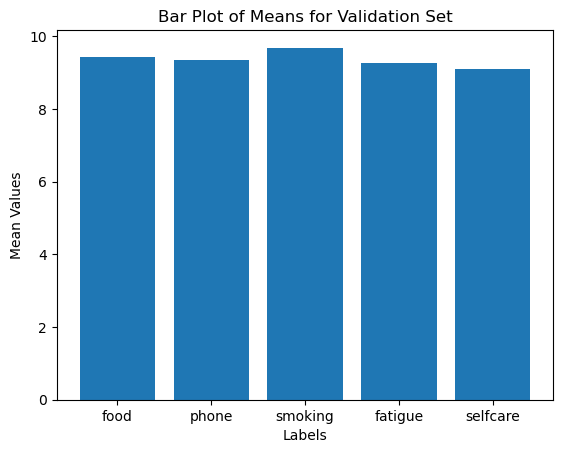

['eating burger', 'eating cake', 'eating carrots', 'eating chips', 'eating doughnuts', 'eating hotdog', 'eating ice cream', 'eating spaghetti', 'eating watermelon', 'sucking lolly', 'tasting beer', 'tasting food', 'tasting wine', 'sipping cup']


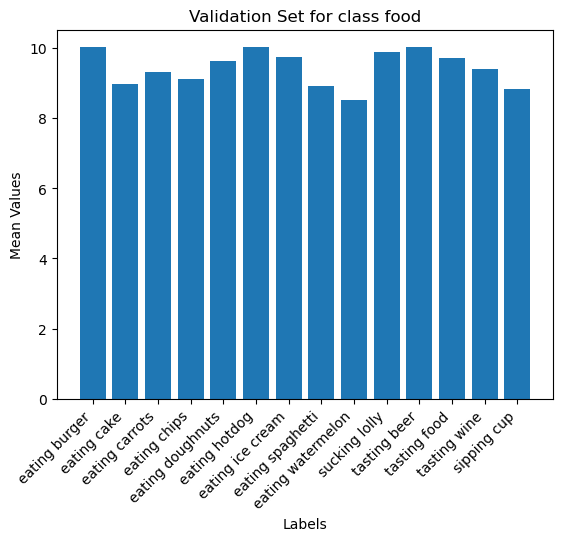

['texting', 'talking on cell phone', 'looking at phone']


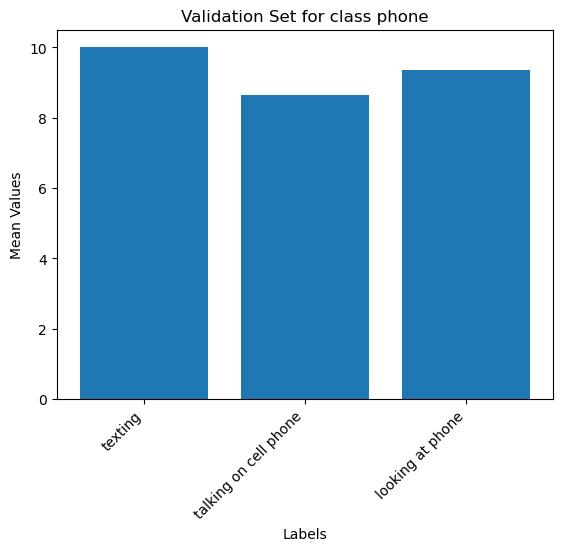

['smoking', 'smoking hookah', 'smoking pipe']


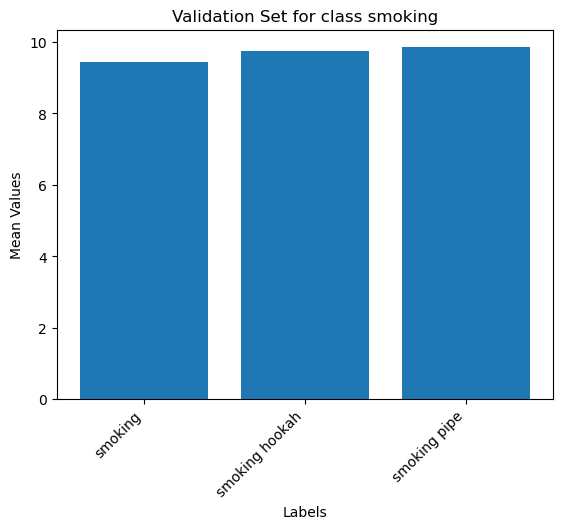

['sleeping', 'yawning', 'headbanging', 'headbutting', 'shaking head']


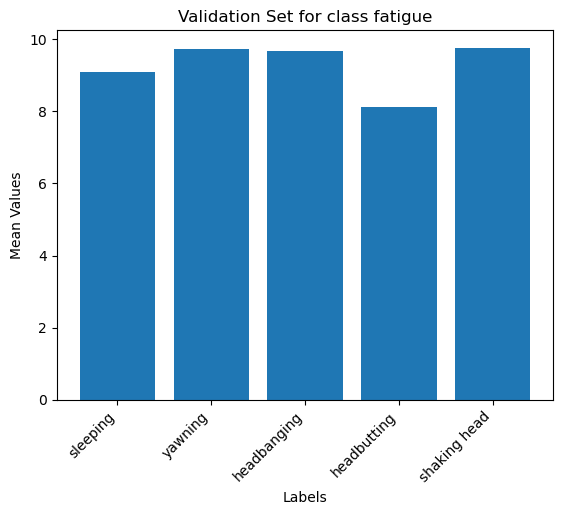

['scrubbing face', 'putting in contact lenses', 'putting on eyeliner', 'putting on foundation', 'putting on lipstick', 'putting on mascara', 'brushing hair', 'brushing teeth', 'braiding hair', 'combing hair', 'dyeing eyebrows', 'dyeing hair']


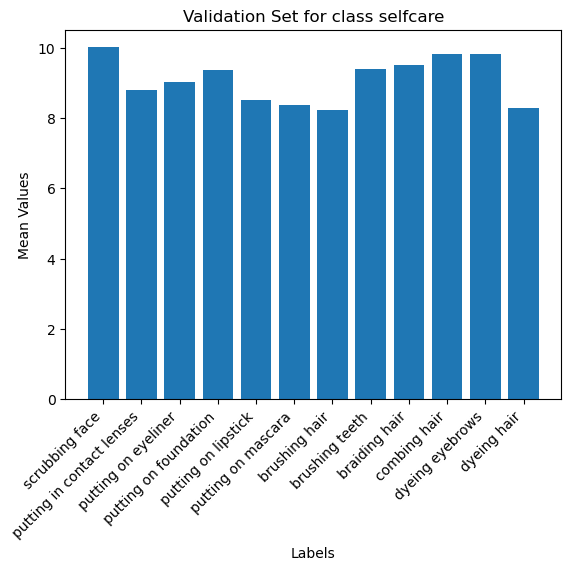

In [55]:
#now only validation
train_csv = '../Kinetics/Info/validation.csv'
mean_behavior, mean_classes = get_means(data_csv,train_csv)
#make a bar plot with data from mean_classes
labels = list(mean_classes.keys())
means = list(mean_classes.values())

# Create a bar plot
plt.bar(labels, means)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Mean Values')
plt.title('Bar Plot of Means for Validation Set')

# Show the plot
plt.show()
output_path = '../statistics_to_save/'
save_name = os.path.join(output_path,'validation_classes.png')
plt.savefig(save_name)

#make a bar plot with data from mean_behavior
labels = list(mean_behavior.keys())
means = list(mean_behavior.values())

for class_name, subcategories in data_dict.items():
    labels = list(data_dict[class_name])
    print(subcategories)
    means = [ mean_behavior[subcategory] for subcategory in subcategories]

    # Create a bar plot
    plt.bar(labels, means)

    # Add labels and title
    plt.xlabel('Labels')
    plt.ylabel('Mean Values')
    plt.title(f'Validation Set for class {class_name}')
    plt.xticks(rotation=45, ha='right')


    # Show the plot
    plt.show()
    save_name = os.path.join(output_path,f'validation_{class_name}.png')
    plt.savefig(save_name)

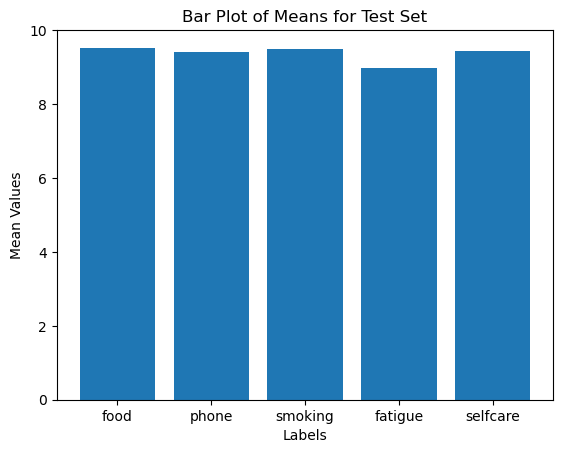

['eating burger', 'eating cake', 'eating carrots', 'eating chips', 'eating doughnuts', 'eating hotdog', 'eating ice cream', 'eating spaghetti', 'eating watermelon', 'sucking lolly', 'tasting beer', 'tasting food', 'tasting wine', 'sipping cup']


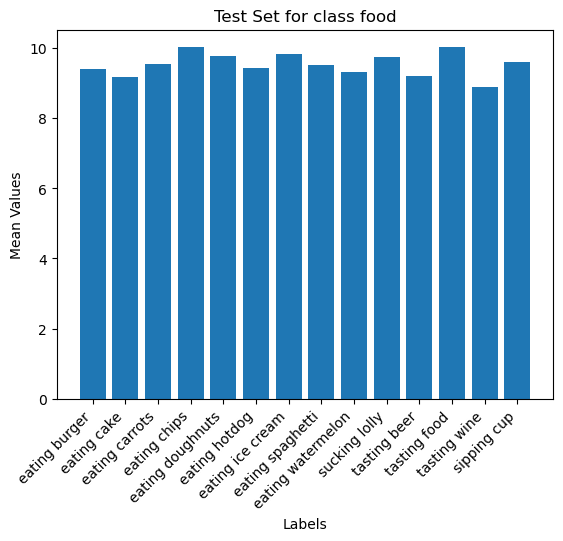

['texting', 'talking on cell phone', 'looking at phone']


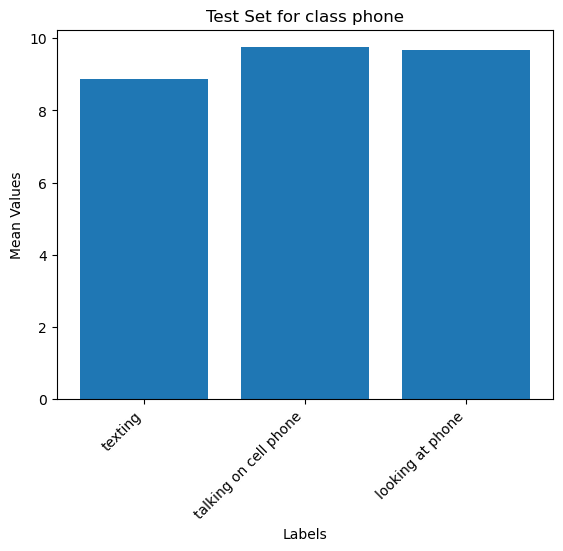

['smoking', 'smoking hookah', 'smoking pipe']


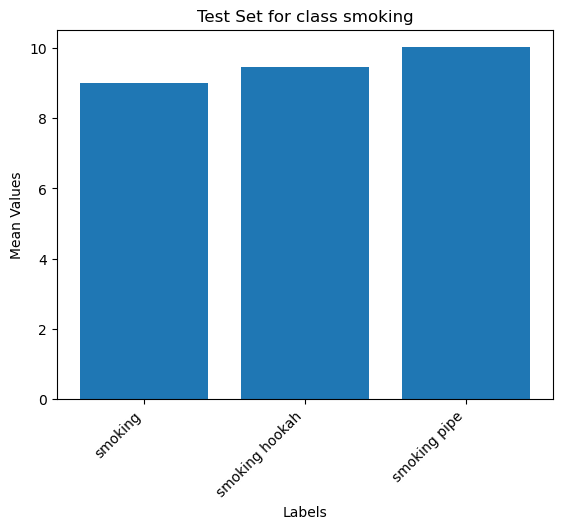

['sleeping', 'yawning', 'headbanging', 'headbutting', 'shaking head']


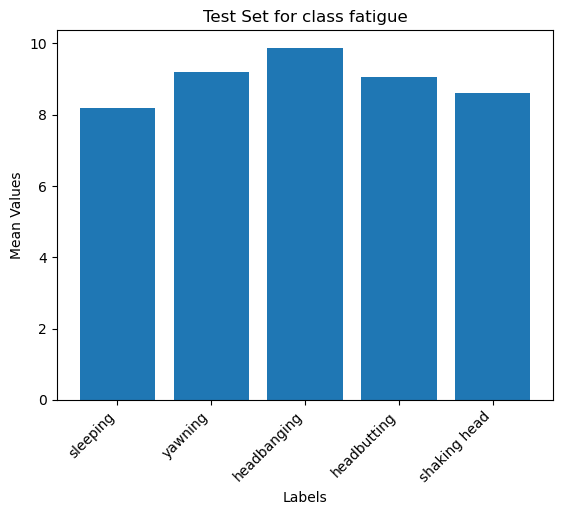

['scrubbing face', 'putting in contact lenses', 'putting on eyeliner', 'putting on foundation', 'putting on lipstick', 'putting on mascara', 'brushing hair', 'brushing teeth', 'braiding hair', 'combing hair', 'dyeing eyebrows', 'dyeing hair']


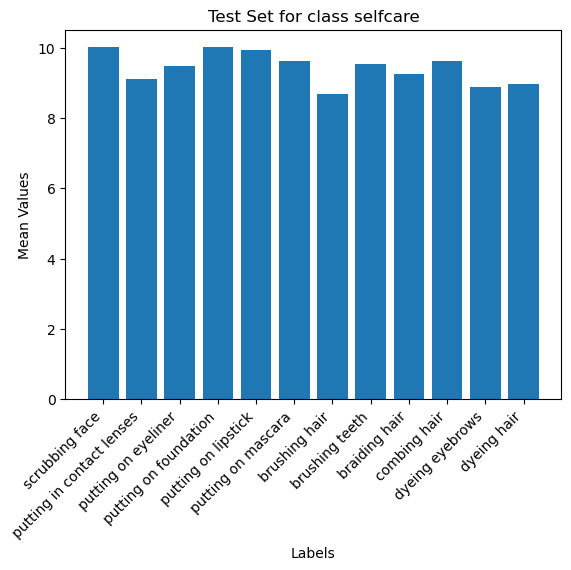

In [56]:
#now only test
train_csv = '../Kinetics/Info/test.csv'
mean_behavior, mean_classes = get_means(data_csv,train_csv)
#make a bar plot with data from mean_classes
labels = list(mean_classes.keys())
means = list(mean_classes.values())

# Create a bar plot
plt.bar(labels, means)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Mean Values')
plt.title('Bar Plot of Means for Test Set')

# Show the plot
plt.show()
output_path = '../statistics_to_save/'
save_name = os.path.join(output_path,'test_classes.png')
plt.savefig(save_name)

#make a bar plot with data from mean_behavior
labels = list(mean_behavior.keys())
means = list(mean_behavior.values())

for class_name, subcategories in data_dict.items():
    labels = list(data_dict[class_name])
    print(subcategories)
    means = [ mean_behavior[subcategory] for subcategory in subcategories]

    # Create a bar plot
    plt.bar(labels, means)

    # Add labels and title
    plt.xlabel('Labels')
    plt.ylabel('Mean Values')
    plt.title(f'Test Set for class {class_name}')
    plt.xticks(rotation=45, ha='right')


    # Show the plot
    plt.show()
    save_name = os.path.join(output_path,f'test_{class_name}.png')
    plt.savefig(save_name)